In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import bernoulli

## Initial Conditions

We start by generating x and y data from a joint gaussian distribution with a covariance of 0.6. The data matrix is clipped so that all entries are greater than zero.

In [143]:
# Generate initial covariance matrix
mean = 3
size = 1000
covariance = [[1.0, 0.6], [0.6, 1.0]]
data = np.clip(np.random.multivariate_normal([mean, mean], covariance, size), 0, 10)

In [144]:
x = [dat[0] for dat in data]
y = [dat[1] for dat in data]
df = pd.DataFrame({'x':x, 'y':y})

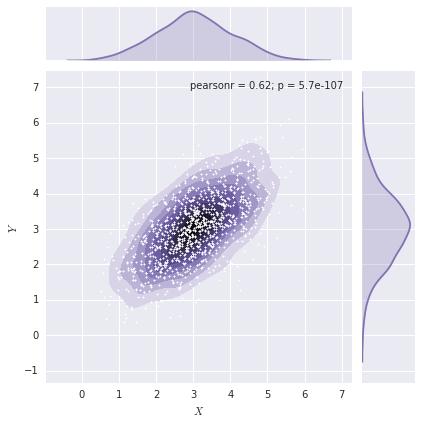

In [145]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=2, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

In [146]:
p = 0.8
# Generate Bernoulli random variates
r_x = bernoulli.rvs(p, size=size)
r_y = bernoulli.rvs(p, size=size)

In [147]:
# If the Bernoilli trial was a success, set the original value to 0
df['x_dropped'] = df['x']
df['x_dropped'][r_x > 0] = 0
df['y_dropped'] = df['y']
df['y_dropped'][r_y > 0] = 0

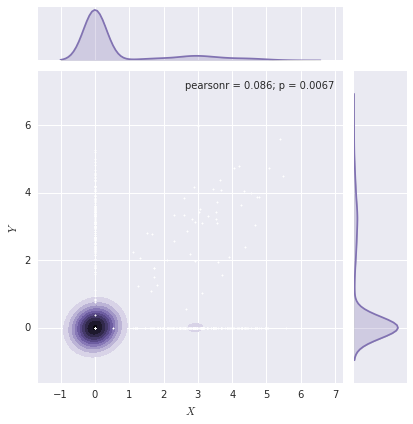

In [148]:
g = sns.jointplot(x="x_dropped", y="y_dropped", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=2, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

### Plot Non-zero entries 

Although the majority of the data is now at (0,0), we can find the non-zero entries and recover the original relationship between x and y

In [149]:
filtered_df = df[(df['x_dropped'] > 0) & (df['y_dropped'] > 0)]

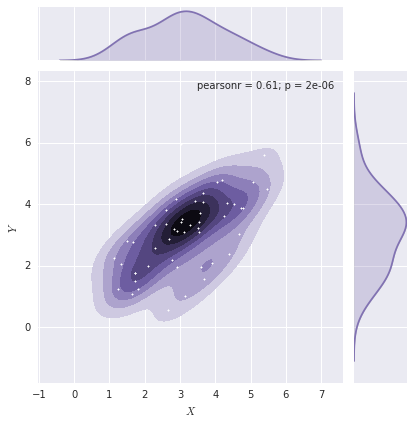

In [150]:
g = sns.jointplot(x="x_dropped", y="y_dropped", data=filtered_df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=2, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

#### Conclusion
By independently setting 80% of the entries in x and y to zero, the pearson R has remained high, but the power has decreased due to the loss of >95% of the data points. The p-value for this correlation finding is only ~ 10^-6. 

In [151]:
# Generate Bernoulli random variates
r_x = bernoulli.rvs(p, size=size)
r_y = bernoulli.rvs(p, size=size)

In [152]:
# If the Bernoilli trial was a success, multiply the original value by a uniform random variable in [0, 1] 
df['x_lowered'] = df['x']
df['x_lowered'][r_x > 0] = df['x'][r_x > 0] * np.random.rand(len(df['x'][r_x > 0]))
df['y_lowered'] = df['y']
df['y_lowered'][r_x > 0] = df['y'][r_x > 0] * np.random.rand(len(df['y'][r_x > 0]))

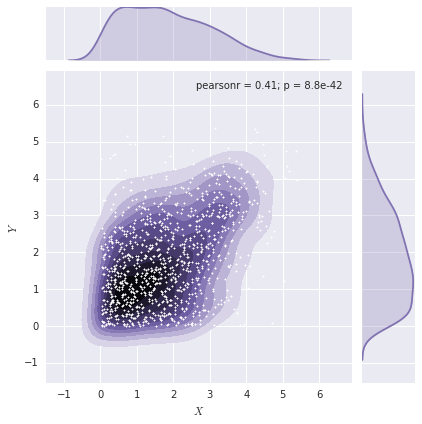

In [153]:
g = sns.jointplot(x="x_lowered", y="y_lowered", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=2, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

#### Conclusion
By independently setting 80% of the entries in x and y to a fraction of their original value (according to a uniform distribution from the original data value to 0), the pearson R has dropped to 0.42, but the power has decreased due to the loss of >95% of the data points. The p-value for this correlation is still very low, on the order of 10^-42

### Appendix: Some views of the data:

In [159]:
df.head()

,x,y,x_dropped,y_dropped,x_lowered,y_lowered
0,3.168414,3.178549,0.000000,0.00000,0.287126,2.433368
1,3.627303,3.162187,0.000000,0.00000,0.848864,1.140622
2,1.001803,1.604638,0.000000,0.00000,0.804916,0.553370
3,3.430441,4.119080,3.430441,4.11908,3.430441,4.119080
4,2.372889,2.319361,0.000000,0.00000,0.953250,2.274290


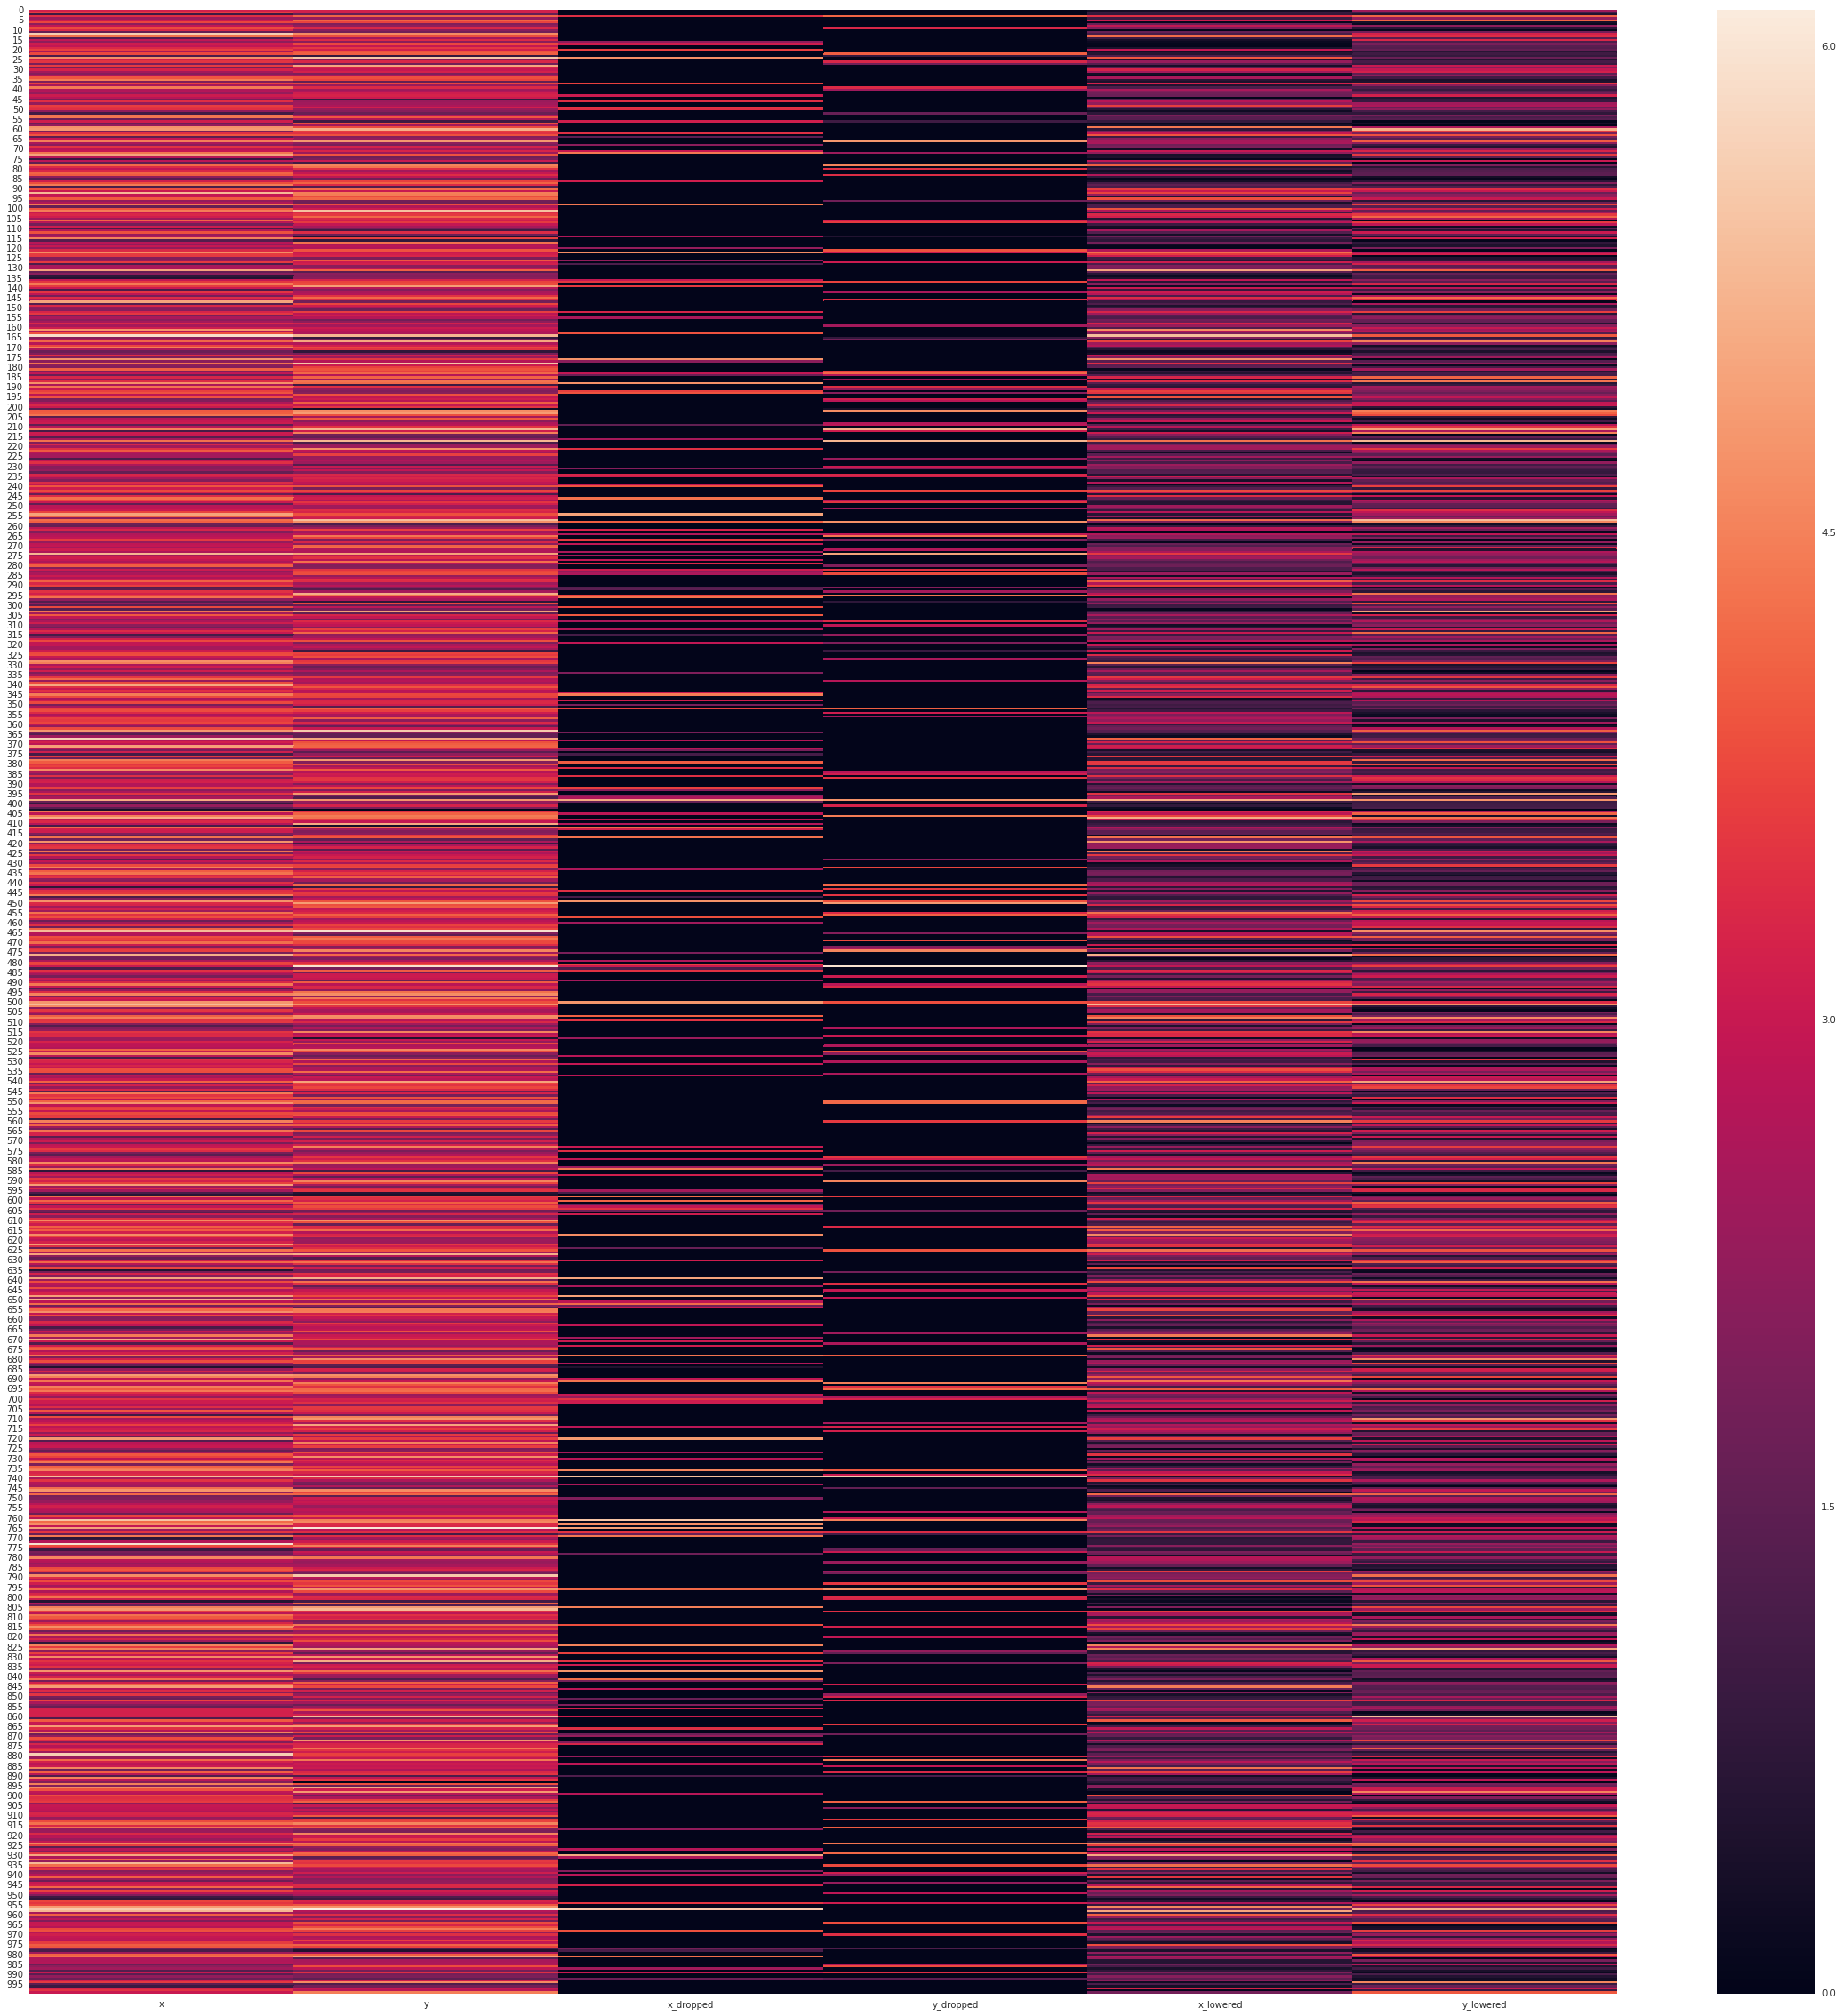

In [160]:
plt.figure(figsize=(40,40))
sns.heatmap(df)

In [157]:
help(np.random.multivariate_normal)

Help on built-in function multivariate_normal:

multivariate_normal(...)
    multivariate_normal(mean, cov[, size, check_valid, tol])
    
    Draw random samples from a multivariate normal distribution.
    
    The multivariate normal, multinormal or Gaussian distribution is a
    generalization of the one-dimensional normal distribution to higher
    dimensions.  Such a distribution is specified by its mean and
    covariance matrix.  These parameters are analogous to the mean
    (average or "center") and variance (standard deviation, or "width,"
    squared) of the one-dimensional normal distribution.
    
    Parameters
    ----------
    mean : 1-D array_like, of length N
        Mean of the N-dimensional distribution.
    cov : 2-D array_like, of shape (N, N)
        Covariance matrix of the distribution. It must be symmetric and
        positive-semidefinite for proper sampling.
    size : int or tuple of ints, optional
        Given a shape of, for example, ``(m,n,k)``, ``m*n